In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import glob

# set exp. parameters
pumpPower = 0.014
measureTime = 30

# human sorting (Natrual sorting)
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]


# read files (sorted by natrual_keys) to a 3-D NumPy array
for files in sorted(glob.glob("*mV.csv"), key=natural_keys):
    print(files)
    try:
        dataTemp = np.genfromtxt(files, delimiter='\t')
        dataTemp = dataTemp[:, :, np.newaxis]
        data = np.concatenate((data, dataTemp), axis=2)
    except NameError:
        data = np.genfromtxt(files, delimiter='\t')
        data = data[:, :, np.newaxis]


500mV.csv
1000mV.csv
1500mV.csv
2000mV.csv
2500mV.csv
3000mV.csv
3500mV.csv
4000mV.csv
4500mV.csv
5000mV.csv


In [2]:
# Calculate biphotonRates, storing to NumPy array
biphotonRates = np.array([])

for i in range(np.shape(data)[2]):
    totalSum = np.sum(data[:,1, i])
    noiseAverage1024 = np.average(data[795:996,1, i])*1024
    areaOfPeak = totalSum - noiseAverage1024
    biphotonRate = areaOfPeak/pumpPower/measureTime
    biphotonRates = np.append(biphotonRates, biphotonRate)

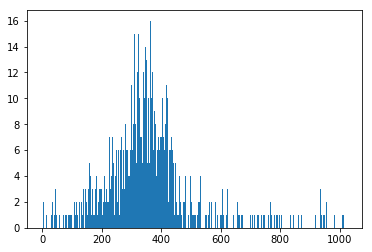

In [88]:
x_ = np.arange(1024)
y_ = data[:, 1, 1]
y_std = np.std(data[:, 1, 0])
y_avg = np.average(data[:, 1, 0])
plt.bar(x_, y_, width=1)
# plt.hist(y_, bins=np.logspace(0, 3))
# plt.gca().set_xscale("log")
plt.show()

In [87]:
origin_data = np.array([])
np.append(origin_data, )

In [92]:
y_[350]

44.0

In [93]:
x_[350]

350

In [148]:
tmp = np.array([])
for i in range(1024):
    for j in range(int(y_[i])):
        tmp = np.append(tmp, x_[i])


In [149]:
plt.hist(tmp, bins=300, normed=True)
# plt.show()

(array([ 0.00064648,  0.00038789,  0.00038789,  0.00051719,  0.00025859,
         0.00025859,  0.00025859,  0.        ,  0.00064648,  0.00077578,
         0.00025859,  0.0001293 ,  0.00038789,  0.00051719,  0.00025859,
         0.0001293 ,  0.00025859,  0.0001293 ,  0.00051719,  0.        ,
         0.00090508,  0.0001293 ,  0.00051719,  0.00051719,  0.        ,
         0.00051719,  0.00038789,  0.00077578,  0.0001293 ,  0.00090508,
         0.00038789,  0.00051719,  0.00038789,  0.00090508,  0.00038789,
         0.00064648,  0.00077578,  0.00051719,  0.00077578,  0.0001293 ,
         0.00116367,  0.00038789,  0.00103437,  0.00103437,  0.00064648,
         0.00103437,  0.00142226,  0.00077578,  0.00064648,  0.00129297,
         0.00077578,  0.00155156,  0.00090508,  0.00116367,  0.00129297,
         0.00051719,  0.00090508,  0.00129297,  0.00116367,  0.00103437,
         0.00090508,  0.00181015,  0.00103437,  0.00142226,  0.00168086,
         0.00103437,  0.00129297,  0.00155156,  0.0

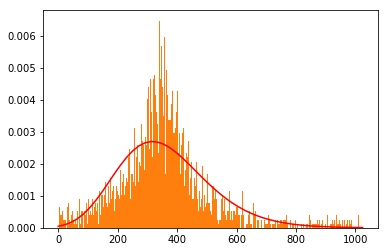

In [150]:
from scipy.stats import lognorm
fit_ = lognorm.fit(tmp)
x=np.linspace(0,1024)
pdf_fitted = lognorm.pdf(x, fit_[0], loc=fit_[1], scale=fit_[2]) # fitted distribution
pdf = lognorm.pdf(x, 0.5, loc=0, scale=1) # original distribution
plt.plot(x, pdf_fitted,'r-')

plt.show()

In [5]:
y_std

3.0310278742309902

In [78]:
y_avg

2.154296875

In [3]:
biphotonRates

array([  4791.44752428,   4785.01539919,   6092.96375267,   9030.73916134,
        17042.17010187,  22625.70480929,  29933.72423596,  34542.25302061,
        39304.3591566 ,  40245.96067283])

In [4]:
# Create x-axis data
x = np.array([])
for file in sorted(glob.glob("*mV.csv"), key=natural_keys):
    fileName = int(file.replace("mV.csv", ""))
    x = np.append(x, fileName)

In [5]:
np.shape(biphotonRates)

(10,)

In [6]:
np.shape(x)

(10,)

In [7]:
temperature

NameError: name 'temperature' is not defined

In [28]:
plt.plot(x, biphotonRates, 'o-')

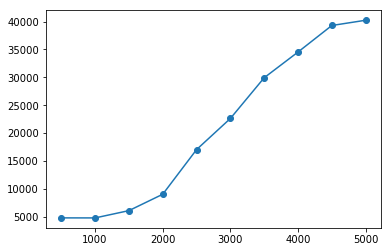

In [29]:
plt.show()

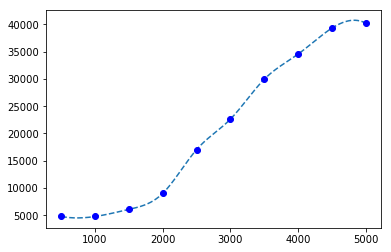

In [41]:
# draw a moooooooth curve!!! 
# save the fugure!!!
from scipy.interpolate import interp1d
f = interp1d(x, biphotonRates, kind='cubic')
xnew = np.linspace(x.min(), x.max(), num=1000, endpoint=True)
fig = plt.figure()
plt.plot(xnew, f(xnew), '--', x, biphotonRates, 'bo')
plt.show()
fig.savefig('temp.png', dpi=fig.dpi)


In [38]:
type(biphotonRates)

numpy.ndarray

In [39]:
plt.savefig("curve.pdf")